# TimML Notebook 3
## Inhomogeneities

Consider a two-aquifer system that contains one inhomogeneity. Inside the inhomogeneity the transmissivity
of the top aquifer is much lower and the transmissivity of the bottom aquifer is much higher than outside the
inhomogeneity. Aquifer properties are given in Table 1 and the inhomogeneity data is given in table 2. There is a uniform gradient of 0.002 in Southeastern
direction.

#### Table 1: Aquifer data

|             | $k$ (m/d) | $z_b$ (m)  | $z_t$ | $c$ (days)|
|------------:|----------:|----------:|------:|-----------:|
|Aquifer 0    |    10     |     0     |   20  |            |
|Leaky Layer 1|           |    -10    |   0   |   4000     |
|Aquifer 1    |    20     |    -30    |   10  |            ||

#### Table 2: Inhomogeneity 1 data


|             | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) |
|------------:|----------:|----------:|------:|-----------:|
|Aquifer 0    |    2      |     0     |   20  |            |
|Leaky Layer 1|           |    -10    |   0   |   500      |
|Aquifer 1    |    80     |    -30    |   -10  |           ||


A layout of the nodes of the inhomogeneity are shown in Fig. 1 (inhomogeneity 2 will be added
later on). A well is located in the top aquifer inside inhomogeneity 1 (the black dot).

<img src="figs/inhomogeneity_exercise3.png"> </img>

#### Figure 1: Layout of elements for exercise 3. A well is located inside inhomogeneity 1. Inhomogeneity 2 is added in the second part of the exercise.

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
ml = ModelMaq(kaq=[10, 20], z=[20, 0, -10, -30], c=[4000])
xy1 = [(0, 600), (-100, 400), (-100, 200), (100, 100), (300, 100), (500, 100),
       (700, 300), (700, 500), (600, 700), (400, 700), (200, 600)]
p1 = PolygonInhomMaq(ml, xy=xy1, 
                     kaq=[2, 80], z=[20, 0, -10, -30], c=[500], 
                     topboundary='conf', order=3, ndeg=2)
rf = Constant(ml, xr=1000, yr=0, hr=40)
uf = Uflow(ml, slope=0.002, angle=-45)
w = Well(ml, xw=400, yw=400, Qw=500, rw=0.2, layers=0)
ml.solve()

Number of elements, Number of equations: 26 , 178
..........................
solution complete


### Questions
#### Exercise 3a
What are the leakage factors of the background aquifer and the inhomogeneity?

In [3]:
print('Leakage factor of the background aquifer is:', ml.aq.lab)
print('Leakage factor of the inhomogeneity is:', p1.lab)

Leakage factor of the background aquifer is: [   0.          730.29674334]
Leakage factor of the inhomogeneity is: [   0.          139.68605915]


#### Exercise 3b
Make a contour plot of both aquifers.

<IPython.core.display.Javascript object>


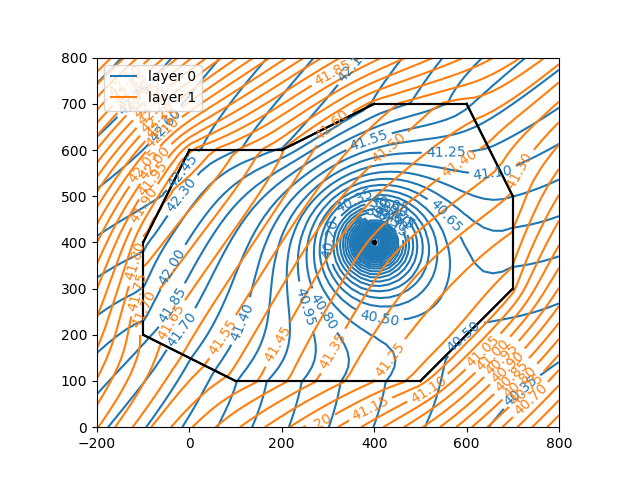

//anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/contour.py:370: RuntimeWarning: invalid value encountered in true_divide
  dist = np.add.reduce(([(abs(s)[i] / L[i]) for i in range(xsize)]), -1)


In [4]:
ml.contour(win=[-200, 800, 0, 800], ngr=50, layers=[0, 1], levels=50, labels=1, decimals=2)

<IPython.core.display.Javascript object>


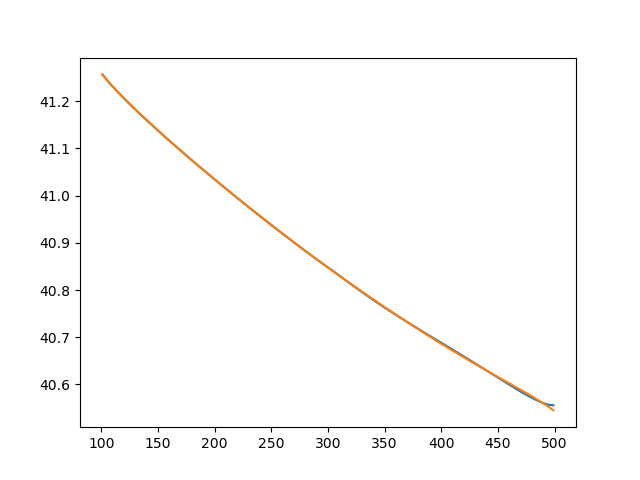

In [5]:
htop = ml.headalongline(linspace(101, 499, 100), 100 + 0.001 * ones(100))
hbot = ml.headalongline(linspace(101, 499, 100), 100 - 0.001 * ones(100))
figure()
plot(linspace(101, 499, 100), htop[0])
plot(linspace(101, 499, 100), hbot[0])

<IPython.core.display.Javascript object>


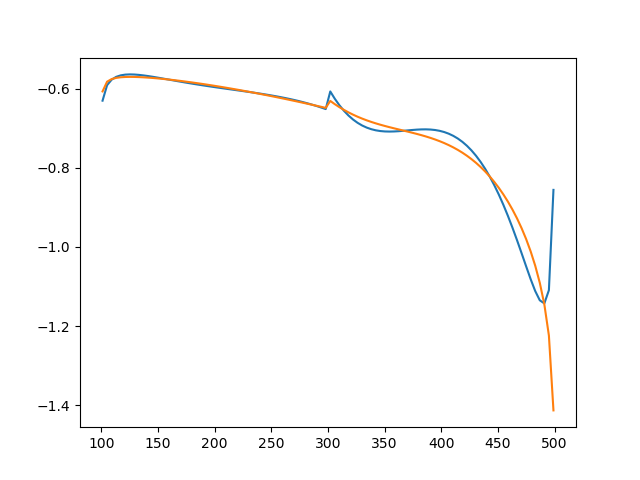

In [6]:
qtop = zeros(100)
qbot = zeros(100)
layer = 1
x = linspace(101, 499, 100)
for i in range(100):
    qx, qy = ml.disvec(x[i], 100 + 0.001)
    qtop[i] = qy[layer]
    qx, qy = ml.disvec(x[i], 100 - 0.001)
    qbot[i] = qy[layer]
figure()
plot(x, qtop)
plot(x, qbot)

#### Exercise 3c
Create a 20-year capture zone for the well, starting the pathlines halfway the top aquifer. First create a contour plot with a cross-section below it.

<IPython.core.display.Javascript object>


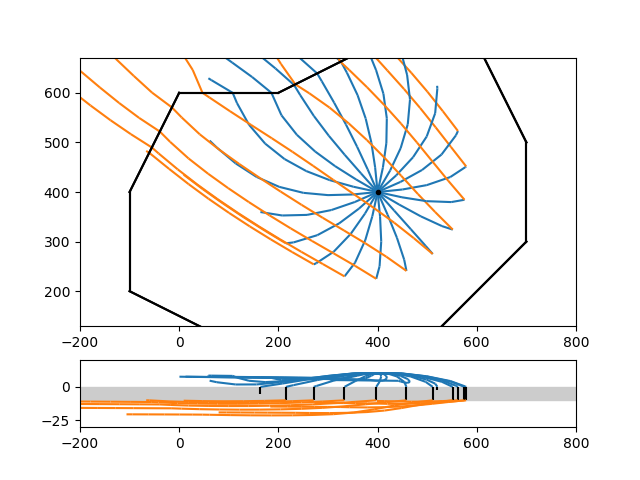

....................

In [7]:
ml.plot(win=[-200, 800, 0, 800], orientation='both')
w.plotcapzone(hstepmax=50, nt=20, zstart=10, tmax=20 * 365.25, orientation='both')

#### Exercise 3d
Change the elevation of the bottom of aquifer 1 from -30 to -20 inside inhomogeneity 1 (you need to recreate the model). Make a
contour plot with a cross-section below it and start some  pathlines from $x=-200$, $y=700$. (note that the cross-section
shows the elevation layers in the background aquifer, not the inhomogeneity). Note that the pathlines jump when they enter and
exit inhomogeneity 1. This is caused by the jump in the base. It meets all continuity conditions and is an
approximation of the smooth change in elevation that occurs over a distance of approximately one aquifer
thickness from the boundary.

In [8]:
ml = ModelMaq(kaq=[10, 20], z=[20, 0, -10, -30], c=[4000])
xy1 = [(0, 600), (-100, 400), (-100, 200), (100, 100), (300, 100), (500, 100),
       (700, 300), (700, 500), (600, 700), (400, 700), (200, 600)]
p1 = PolygonInhomMaq(ml, xy=xy1, 
                     kaq=[2, 80], z=[20, 0, -10, -40], c=[500], 
                     topboundary='conf', order=5, ndeg=3)
rf = Constant(ml, xr=1000, yr=0, hr=40)
uf = Uflow(ml, slope=0.002, angle=-45)
w = Well(ml, xw=400, yw=400, Qw=500, rw=0.2, layers=0)
ml.solve()

Number of elements, Number of equations: 26 , 266
..........................
solution complete


# TO DO: ADD AQUIFER TOP/BOTTOM JUMP

<IPython.core.display.Javascript object>


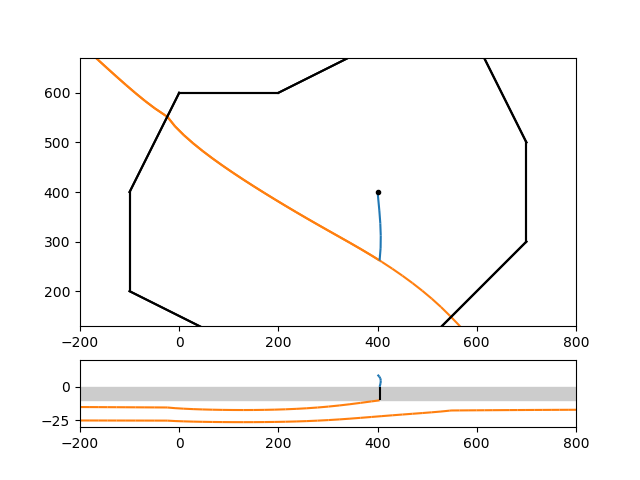

..

In [9]:
ml.plot(win=[-200, 800, 0, 800], orientation='both')
ml.tracelines(-200 * np.ones(2), 700 * np.ones(2), [-25, -15], hstepmax=25, orientation='both')

### Two inhomogeneities

A second inhomogeneity is added, which shares part of its boundary with the first inhomogeneity. The aquifer properties for the inhomogeneity are provided in table 3. Inside this second inhomogeneity, the transmissivity of both the bottom aquifer and the resistance of the leaky layer are reduced. The input is now somewhat complicated. First the data of the two inhomgeneities is entered. Second, analytic elements are placed along the boundary of the inhomogeneity with `MakeInhomPolySide`. 
This routine places line elements along a string of points, but it requires that the
aquifer data is the same on the left and right sides of the line. Hence, for this case we need to break the boundary up
in three sections: One section with the background aquifer on one side and `inhom1` on the other, one section
with the background aquifer on one side and `inhom2` on the other, and one section with `inhom1` on one side
and `inhom2` on the other. The input file is a bit longer

#### Table 3: Inhomogeneity 2 data

|             | $k$ (m/d) | $z_b$ (m) | $z_t$ | $c$ (days) |
|------------:|----------:|----------:|------:|-----------:|
|Aquifer 0    |    2      |     -20   |   0   |            |
|Leaky Layer 1|           |    -40    |   -20 |   50       |
|Aquifer 1    |    8      |    -80    |   -40 |            |

In [10]:
ml = ModelMaq(kaq=[10, 20], z=[20, 0, -10, -30], c=[4000])
xy1 = [(0, 600), (-100, 400), (-100, 200), (100, 100), (300, 100), (500, 100),
       (700, 300), (700, 500), (600, 700), (400, 700), (200, 600)]
p1 = PolygonInhomMaq(ml, xy=xy1, 
                     kaq=[2, 80], z=[20, 0, -10, -30], c=[500], 
                     topboundary='conf', order=4, ndeg=2)
xy2 = [(0, 600), (200, 600), (400, 700), (400, 900), (200, 1100), (0, 1000), (-100, 800)]
p2 = PolygonInhomMaq(ml, xy=xy2, 
                     kaq=[2, 8], z=[20, 0, -10, -30], c=[50], 
                     topboundary='conf', order=4, ndeg=2)
rf = Constant(ml, xr=1000, yr=0, hr=40)
uf = Uflow(ml, slope=0.002, angle=-45)
w = Well(ml, xw=400, yw=400, Qw=500, rw=0.2, layers=0)
ml.solve()

Number of elements, Number of equations: 37 , 323
.....................................
solution complete


<IPython.core.display.Javascript object>


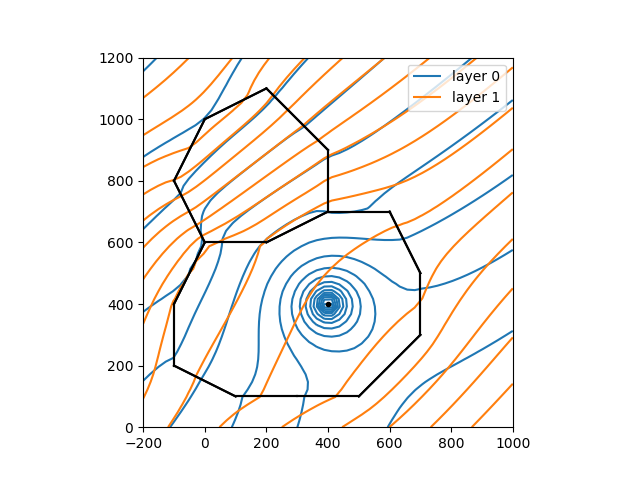

In [11]:
ml.contour(win=[-200, 1000, 0, 1200], ngr=50, layers=[0, 1], 
           levels=20)